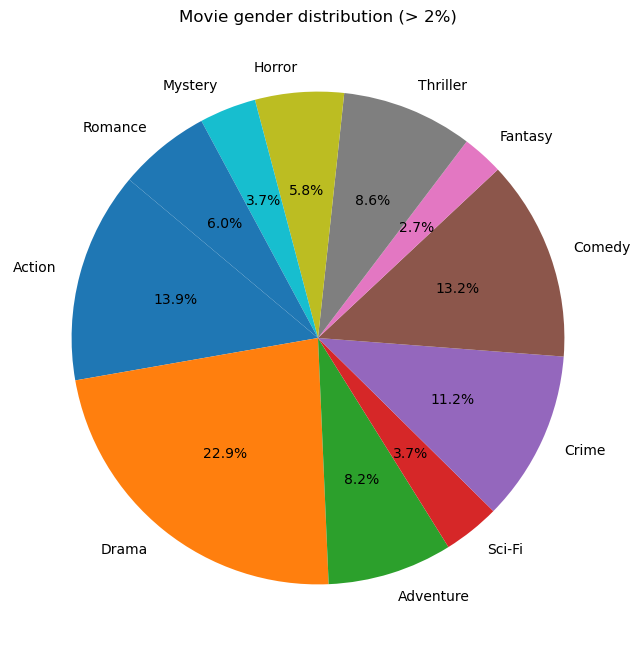

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        # Se houver algum erro ao avaliar a string como uma lista, retorna a string original
        return string


data = pd.read_csv('final_data.csv')
data["Generes"] = data["Generes"].apply(convert_string_to_list)

# Explode as listas para uma linha por gênero
data_exploded = data['Generes'].explode()

# Contagem de ocorrências de cada gênero no dataframe original
genero_contagem = Counter(data_exploded)

# Filtra os gêneros com uma porcentagem de ocorrência superior a 1%
genero_contagem_filtrada = {k: v for k, v in genero_contagem.items() if v / len(data) > 0.05}

# Verificar se há gêneros filtrados
if not genero_contagem_filtrada:
    print("Não há gêneros filtrados para exibir.")
else:
    # Plotar o gráfico de pizza com opções de layout adicionais
    plt.figure(figsize=(8, 8))
    plt.pie(genero_contagem_filtrada.values(), labels=genero_contagem_filtrada.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Movie gender distribution (> 2%)')
    plt.show()